In [18]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pd.options.mode.chained_assignment = None

In [20]:
class_df.columns

Index(['Timestamp', 'Ethnicity', 'What year were you born?',
       'What is your gender?', 'What is your sexuality?',
       'Political Alignment', 'Religion', 'What's your hometown?',
       'Which country was your parent/guardian 1 born?',
       'Which country was your parent/guardian 2 born?',
       'Highest Parent Education',
       'Did at least one of your parents pursue a degree/career in STEM?',
       'Were you in a specialized high school program?',
       'What was your top 6 highschool average for engineering? Please enter just the number with NO % sign (Calc, Adv Functions, English, Physics, Chemistry, 6th course in your top 6) ',
       'What university would you go to if you were not going to Waterloo?',
       'Out of the previously mentioned universities, were you accepted or rejected from your program? If you did not apply to the university, indicate as such [Carleton University]',
       'Out of the previously mentioned universities, were you accepted or rejected 

In [ ]:
relevant_cols = ["What's your hometown?", 'How did you make friends/meet people during online school?']
hometown_campus = class_df[relevant_cols]
hometown_campus.head(10)

In [ ]:
hometown_campus.loc[hometown_campus['How did you make friends/meet people during online school?'].isna() == True, :]

In [ ]:
def count_home_people(row):
    # print(row)
    try:
        if 'I lived on campus' in row['How did you make friends/meet people during online school?']:
            row['home'] = 0
        else:
            row['home'] = 1
    except:
        # field is NaN
        row['home'] = 0
    return row

home_df = hometown_campus.apply(count_home_people, axis=1)
home_df.head(10)

In [24]:
# get the total num of home people
home_df.loc[home_df['home'] == 1, :].count()

What's your hometown?                                         70
How did you make friends/meet people during online school?    70
home                                                          70
dtype: int64

In [ ]:
hometown_campus['How did you make friends/meet people during online school?'] = hometown_campus['How did you make friends/meet people during online school?'].str.split(';')

hometown_campus = (hometown_campus
 .set_index(["What's your hometown?"])['How did you make friends/meet people during online school?']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_1', axis=1)
 .rename(columns={0:'How did you make friends/meet people during online school?'}))

hometown_campus.head(20)

In [ ]:
# filtering for people who lived on campus
hometown_campus = hometown_campus[hometown_campus['How did you make friends/meet people during online school?'] == 'I lived on campus']
hometown_campus

In [ ]:
hometown_campus['Number of people'] = hometown_campus.groupby(["What's your hometown?"])['How did you make friends/meet people during online school?'].transform('count')
hometown_campus

In [ ]:
# index = ['Peel Region', 'Toronto Region', 'USA', 'Durham Region', 'International', 'Halton Region', 'British Columbia', 'Kitchener/Waterloo Region', 'Ottawa–Gatineau Region', 'York Region']
hometown_campus = hometown_campus.drop_duplicates(subset=["What's your hometown?", 'How did you make friends/meet people during online school?', 'Number of people'], keep='first')
hometown_campus

In [29]:
hometown_campus.reset_index(inplace=True, drop=True)

In [ ]:
hometown_campus

In [ ]:
hometown_campus.loc[10] = ['Stayed Home', 'NA', 70]
hometown_campus = hometown_campus.sort_values(by='Number of people')
hometown_campus

In [ ]:
total_respondants = hometown_campus['Number of people'].sum()
hometown_campus['Percentage of People'] = (hometown_campus['Number of people'] / total_respondants) * 100
hometown_campus

Text(0, 0.5, 'Percentage of people')

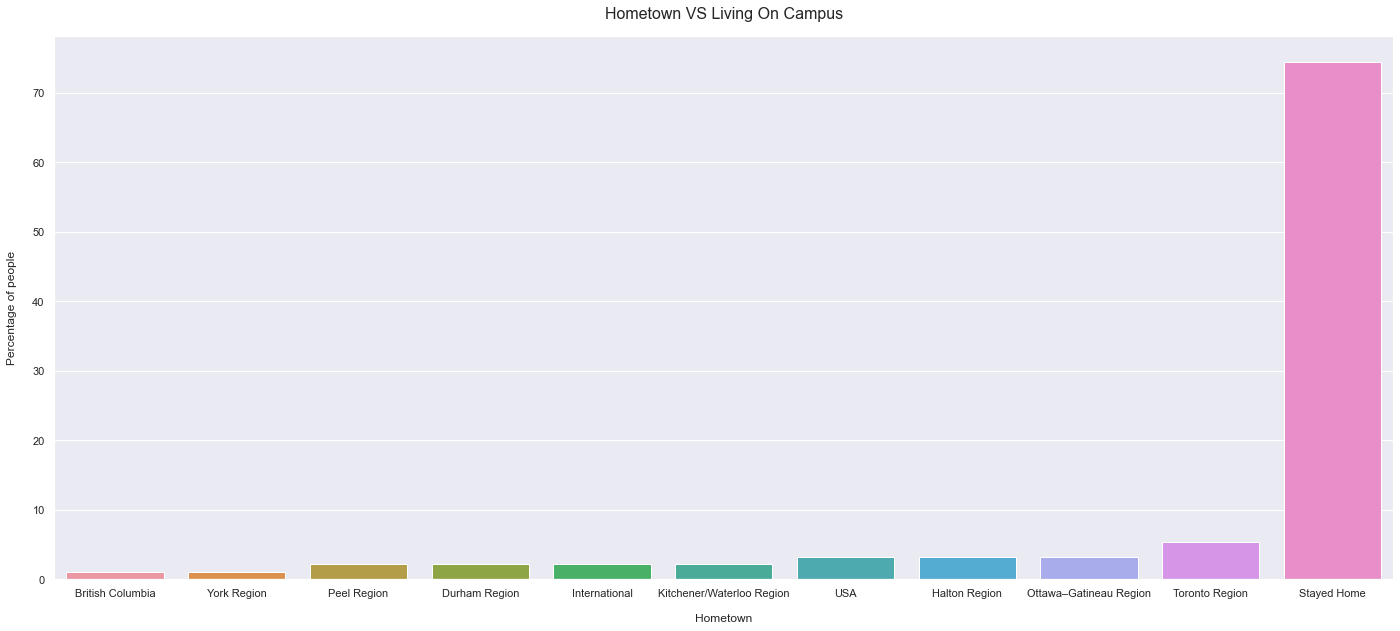

In [33]:
plt.figure(figsize=(24,10))
plt.title("Hometown VS Living On Campus", fontsize=16, y=1.02)
sns.set_style('darkgrid')
sns.set_theme(palette="colorblind")
ax = sns.barplot(x=hometown_campus["What's your hometown?"], y=hometown_campus["Percentage of People"], data=hometown_campus)
# ax.set(ylim=(0, 75))
plt.xlabel("Hometown", labelpad=15)
plt.ylabel("Percentage of people", labelpad=15)